## Parameters exploration

In [1]:
import numpy
import math
from matplotlib import pyplot
from matplotlib.pyplot import cm
import matplotlib.animation as animation
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16


def ftcstest(P0,nt,dt,dx,dy,D,cphi,s1,s2,xinj,yinj,xob,yob,xprod,yprod,tinj):
    
    # Define some constants 
    sigma_x = D * dt / dx**2
    sigma_y = D * dt / dy**2    
     
    # Integrate in time.
    P = P0.copy()
    # Estimate number of grid points in x- and y-direction
    ny, nx = P.shape
    Pcenterline = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterlinec = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    P1 = numpy.linspace(0.0, 0.0, num=nt)
    P2 = numpy.linspace(0.0, 0.0, num=nt)
    P3 = numpy.linspace(0.0, 0.0, num=nt) # for the production center
    
    #Pglob = 0.0 * numpy.ones((ny, nx, nt),dtype='uint8')    
    # Indices of the model center
    I, J = int(nx/ 2), int(ny/ 2) 
    # Time loop
    for n in range(nt):
        print(n, end='\r')
        # store old overpressure field 
        Pn = P.copy()      
        # loops over spatial grid    
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                P[j, i] = (Pn[j, i]  
                           +sigma_x * (Pn[j, i+1] - 2.0 * Pn[j, i] + Pn[j, i-1])
                           +sigma_y * (Pn[j+1, i] - 2.0 * Pn[j, i] + Pn[j-1, i]))
                if i==int(xinj/dx) and j==int(yinj/dy):
                    if n*dt <= tinj:                        
                        P[j,i] = P[j,i] + s1[n]/cphi                      
                        P1[n] = P[j,i]                  
                    else: # constant injected volume Vi
                        s1[n]=0
                        P[j,i] = P[j,i] + s1[n]/cphi 
                        P1[n] = P[j,i] # pressure at the injection point
                if i==int(xprod/dx) and j==int(yprod/dy): # production point
                    if n*dt <= tinj:
                        P[j,i] = P[j,i] + s2[n]/cphi  
                        P3[n] = P[j,i] 
                    else: # constant injected volume Vi
                        s2[n]=0
                        P[j,i] = P[j,i] + s2[n]/cphi
                        P3[n] = P[j,i]                        
                if i==int(xob/dx) and j==int(yob/dy): # observation point           
                    P2[n] = P[j,i] 
                if j==int(yob/dy) :  # observation profile
                    Pcenterline[i,n]=P[j,i]
                if j==int(yinj/dy) :  # observation profile
                    Pcenterlinec[i,n]=P[j,i]                    
            # Apply Neumann conditions (zero-gradient) at top and right and left boundary
        P[-1, :] = P[-2, :]
        P[0, :] = P[1, :] 
        P[:, -1] = P[:, -2]
        P[:, 0] = P[:, 1] 
        # Check if the center of the domain has reached P = 700e6 Pa.
        if P[J, I] >= 700.0e6:
            break            
    print('[time step {}] Center at P={:.2f} Pa at t={:.2f} h, {:.2f} days'
          .format(n + 1, P[J, I], (n + 1) * dt, (n + 1) * dt / 24))   
    return P,P1,P2,P3,Pcenterline,Pcenterlinec#,Pglob


dx =  50.0 m and dy =  50.0 m and dt =  0.008680555555555558 h and nt =  16588
For a monopole :
injection point :  10000 10000
[time step 16588] Center at P=2660.02 Pa at t=143.99 h, 6.00 days


C:\Users\bvallier\AppData\Local\Temp\ipykernel_25216\2379153723.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  Pt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*math.exp(-((xob-xinj)**2+(yob-yinj)**2)/(4*D*tt))
C:\Users\bvallier\AppData\Local\Temp\ipykernel_25216\2379153723.py:94: RuntimeWarning: invalid value encountered in double_scalars
  Pt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*math.exp(-((xob-xinj)**2+(yob-yinj)**2)/(4*D*tt))


For a dipole :
injection point for the dipole case :  10050 10000
production point for the dipole case :  9950 10000
[time step 16588] Center at P=-0.00 Pa at t=143.99 h, 6.00 days
x0,y0 =  10000.0 , 10000.0


C:\Users\bvallier\AppData\Local\Temp\ipykernel_25216\2379153723.py:159: RuntimeWarning: divide by zero encountered in double_scalars
  Pdipt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*(math.exp(-((xob-xinjdip)**2+(yob-yinjdip)**2)/(4*D*tt))-math.exp(-((xob-xprod)**2+(yob-yprod)**2)/(4*D*tt)))
C:\Users\bvallier\AppData\Local\Temp\ipykernel_25216\2379153723.py:159: RuntimeWarning: invalid value encountered in double_scalars
  Pdipt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*(math.exp(-((xob-xinjdip)**2+(yob-yinjdip)**2)/(4*D*tt))-math.exp(-((xob-xprod)**2+(yob-yprod)**2)/(4*D*tt)))


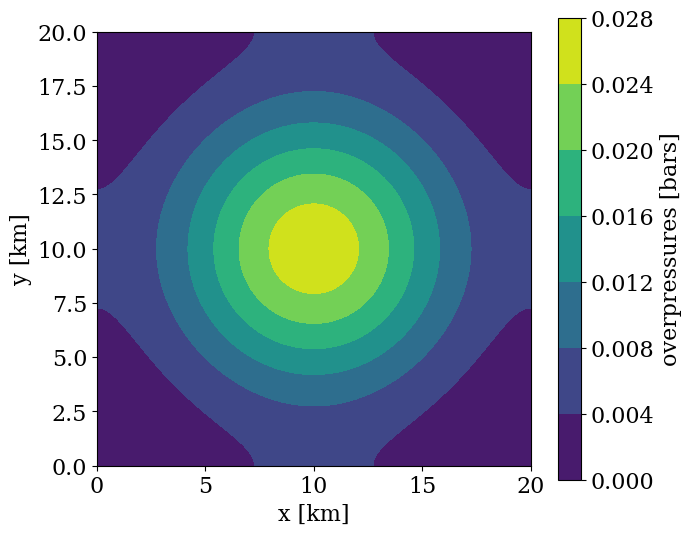

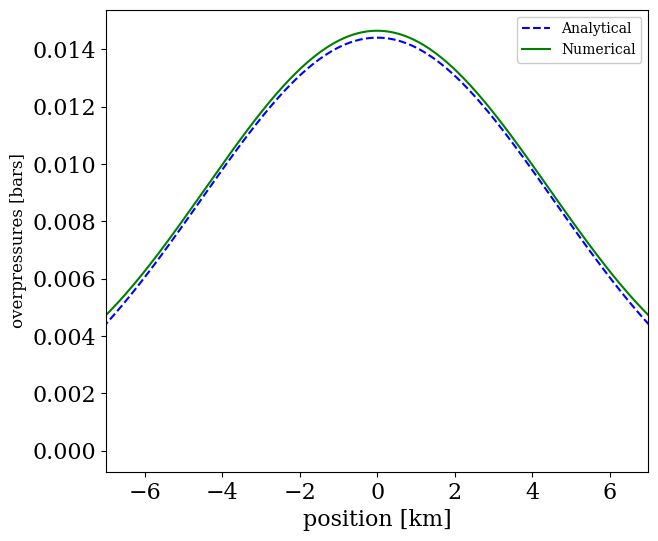

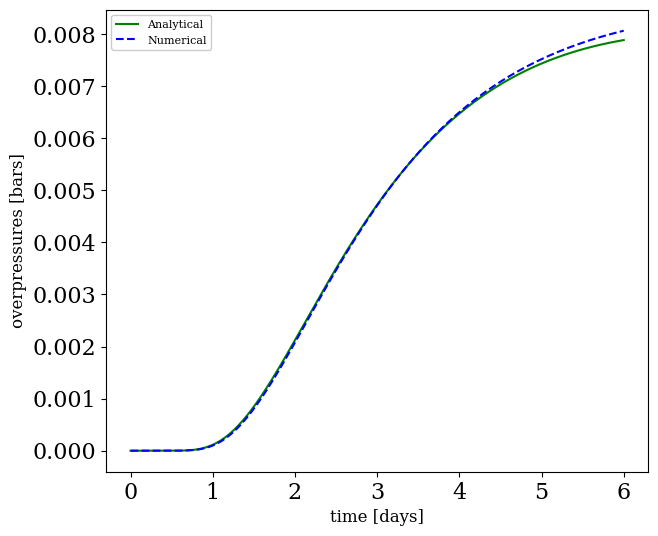

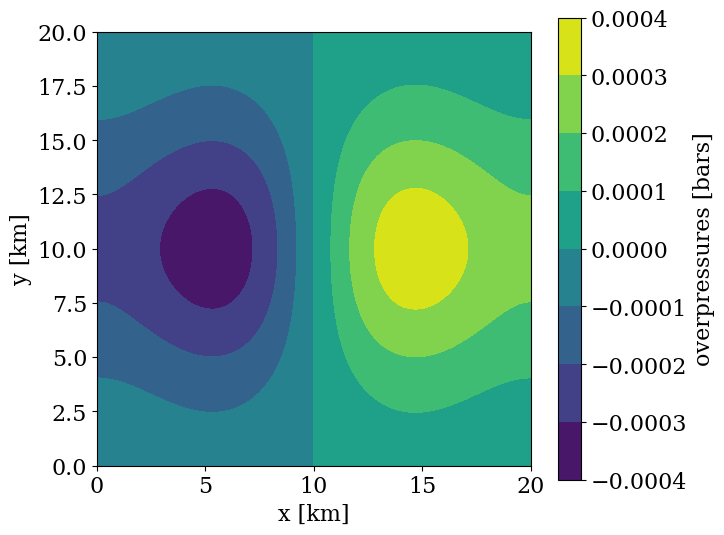

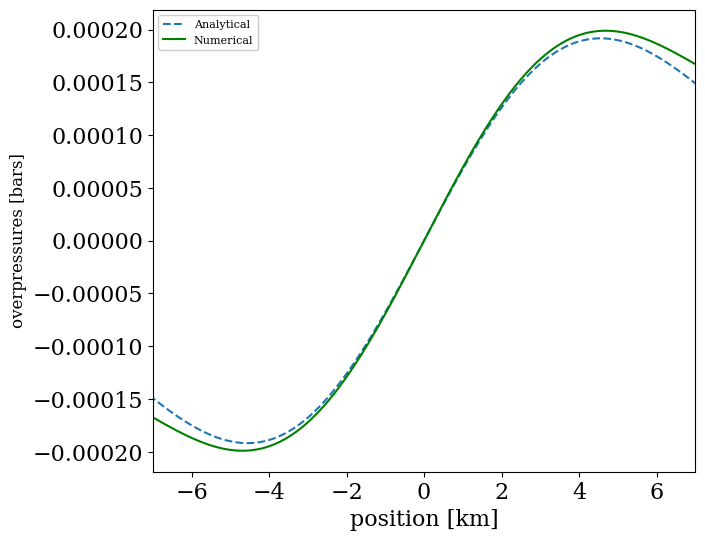

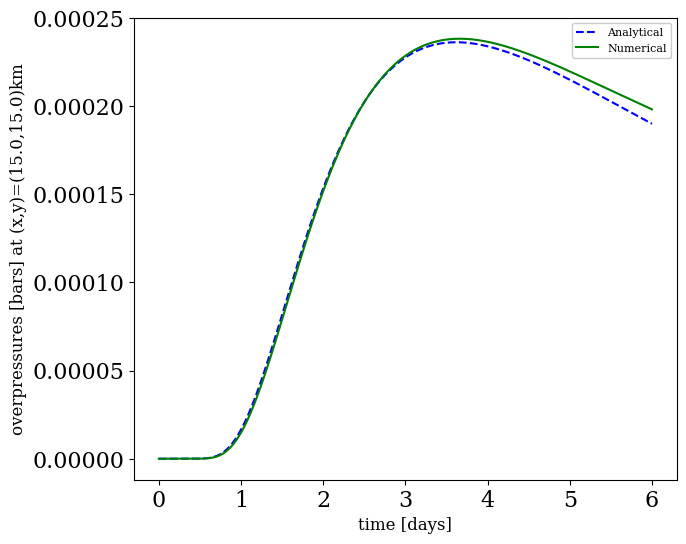

In [2]:
## Main code where parameters are set.
Lx = 20000.  # length of the fault in the x direction in m
Ly = 20000.  # height of the fault in the y direction in m
nx = 401  # number of points in the x direction
ny = 401  # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
kappa = 1e-13 # permeability in m^2
compr = 5e-10 #water compressibility in 1/Pa
phi = 0.01 # porosity in 1/Pa
mu = 1e-3 # water dynamic viscosity in Pa.s
cphi = compr*phi #water compressibility times porosity in 1/Pa
D = kappa/(mu*cphi)*3600 # pressure diffusivity in m^2/h 
Qinj=120. #in m^3/h
h=70 # permeable zone thickness in m
tinj=1 # time of the stabilisation of the injection in h
Vi = Qinj*tinj # injected volume in m^3
tob=6*24 # observation time 

## space
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

## observation points less and less close to the injection and production points
xinj=int(Lx/2) # injection point x for monopole
yinj=int(Ly/2) # injection point y for monopole
xob=int(Lx/2+5000) # obversation point x
yob=int(Ly/2+5000)
yinjdip=int(Ly/2) # injection point y for dipole
yprod=int(Ly/2) # injection point y
xinjdip=int(Lx/2+50)
xprod=int(Lx/2-50)

## Compute the initial overpressure distribution.
Pb = 0.0  # overpressure at the left and bottom boundaries
P0 = 0.0 * numpy.ones((ny, nx))
P0[0, :] = Pb
P0[:, 0] = Pb
## Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / D  # time-step size
nt=int(tob/dt)
## time
t = numpy.linspace(0.0, tob, num=nt)
print('dx = ',dx,'m and dy = ',dy,'m and dt = ',dt,'h and nt = ',nt)

## Define the source for the injection point
csource=(Vi/(dx*dy*h))*(dt/tinj) # linear rise of the injected volume

## MONOPOLE ------------------------------

s1=numpy.linspace(csource, csource, num=nt) # in m^3/h/dx^2
s2=numpy.linspace(0.,0., num=nt) # monopole 

## Define the locations along a gridline.
P1 = numpy.linspace(0.0, 0.0, num=nt)
P2 = numpy.linspace(0.0, 0.0, num=nt)
P3 = numpy.linspace(0.0, 0.0, num=nt)
Pcenterline=0.0 * numpy.ones((nx, nt))

## Compute the pressure distribution with the finite difference method for a monopole
print('For a monopole :')
print('injection point : ',xinj,yinj)
P,P1,P2,P3,Pcenterline,Pcenterlinec=ftcstest(P0,nt,dt,dx,dy,D,cphi,s1,s2,xinj,yinj,xob,yob,xprod,yprod,tinj)

## Plot P(x,y) for a monopole
pyplot.figure(figsize=(7.0, 6.0))
pyplot.xlabel('x [km]')
pyplot.ylabel('y [km]')
contf = pyplot.contourf(x/1000., y/1000., P/1e5)
cbar = pyplot.colorbar(contf)
cbar.set_label('overpressures [bars]')
pyplot.axis('scaled');

# P(x): Far from the centre : FTSC vs Green
r=((x-xinj)**2+(yob-yinj)**2)**0.5
PG=numpy.linspace(0.0, Lx, num=nx)
for i,rr in enumerate(r):
    PG[i]=(Qinj*tinj /(cphi*h*4*math.pi*D*tob))*math.exp(-(rr**2)/(4*D*tob))/1e5
pyplot.figure(figsize=(7.0, 6.0))
pyplot.plot((x-int(Lx/2))/1000,PG,'b--',label='Analytical')
pyplot.plot((x-int(Lx/2))/1000,Pcenterline[:,-1]/1e5,'g',label='Numerical')
pyplot.xlabel('position [km]')
pyplot.ylabel('overpressures [bars]',fontsize=12)
pyplot.legend(loc='best',framealpha=1,prop={'size':10.0})
pyplot.xlim([-7,7])

# P(t): Far from the centre : FTSC vs Green
pyplot.figure(figsize=(7.0, 6.0))
Pt=numpy.linspace(0.0, 0.0, num=nt)
Pth=numpy.linspace(0.0, 0.0, num=nt)
Pth[:]=(Qinj*tinj/(cphi*h))*(1/((xob-xinj)**2+(yob-yinj)**2))*(math.exp(-1)/math.pi) # Green Pmax at a set position
for it,tt in enumerate(t):
    Pt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*math.exp(-((xob-xinj)**2+(yob-yinj)**2)/(4*D*tt))
pyplot.plot(t/24,Pt/1e5,'g',label='Analytical')
pyplot.plot(t/24,P2/1e5,'b--',label='Numerical')
pyplot.xlabel('time [days]',fontsize=12)
pyplot.ylabel('overpressures [bars]',fontsize=12)
pyplot.legend(loc='best',framealpha=1,prop={'size':8.0})

## DIPOLE ------------------------------
print('For a dipole :')
Pcenterlinedip=0.0 * numpy.ones((nx, nt),dtype='uint8')
P1dip = numpy.linspace(0.0, 0.0, num=nt)
P2dip = numpy.linspace(0.0, 0.0, num=nt)
P3dip = numpy.linspace(0.0, 0.0, num=nt)
csource=(Vi/(dx*dy*h))*(dt/tinj)
s1=numpy.linspace(csource, csource, num=nt) # in m^3/h/dx^2
s2=numpy.linspace(-csource,-csource, num=nt)
print('injection point for the dipole case : ',xinjdip,yinjdip)
print('production point for the dipole case : ',xprod,yprod)

# P calculated by FTCS
Pdip,P1dip,P2dip,P3dip,Pcenterlinedip,Pcenterlinedipc=ftcstest(P0,nt,dt,dx,dy,D,cphi,s1,s2,xinjdip,yinjdip,xob,yob,xprod,yprod,tinj)

## Plot P(x,y) for a dipole
pyplot.figure(figsize=(7.0, 6.0))
pyplot.xlabel('x [km]')
pyplot.ylabel('y [km]')
contf = pyplot.contourf(x/1000., y/1000., Pdip/1e5)
cbar = pyplot.colorbar(contf)
cbar.set_label('overpressures [bars]')
pyplot.axis('scaled')

## Plot, hypothetical Green Function vs calculated P 
## Analytical P from Green Function for dipole
L=((xinjdip-xprod)**2)**0.5 # distance between the injection and production points
r1=L*0.5
# coordinates of the dipole center
x0=(xinjdip+xprod)*0.5
y0=(yinjdip+yprod)*0.5
print('x0,y0 = ',x0,',',y0)
rr1=(x-x0)*(xinjdip-x0)+(y-y0)*(yinjdip-y0)
r1=((xinjdip-x0)**2+(yinjdip-y0)**2)**0.5
r=((x-x0)**2+(y-y0)**2)**0.5
PGdip=numpy.linspace(0.0, Lx, num=nx)
PGdip2=numpy.linspace(0.0, Lx, num=nx)
PGdipsh=numpy.linspace(0.0, Lx, num=nx)
for i,rr in enumerate(r):
    rinj=((x[i]-xinjdip)**2+(yob-yinjdip)**2)**0.5
    rpro=((x[i]-xprod)**2+(yob-yprod)**2)**0.5
    PGdip[i]=(Qinj*tinj /(cphi*h*4*math.pi*D*tob))*(math.exp(-(rinj**2)/(4*D*tob))-math.exp(-(rpro**2)/(4*D*tob)))

## P(x): Plot, hypothetical Green Function exemple vs calculated P with an injection time of one hour 
pyplot.figure(figsize=(7.0, 6.0))
pyplot.plot((x-int(Lx/2))/1000,PGdip/1e5,'--',label='Analytical')
pyplot.plot([(xx-int(Lx/2))/1000 for ix,xx in enumerate(x) if ix%2==0],[pp/1e5 for ip,pp in enumerate(Pcenterlinedip[:,-1]) if ip%2==0],'g',label='Numerical')
pyplot.xlabel('position [km]')
pyplot.ylabel('overpressures [bars]',fontsize=12)
pyplot.legend(loc='best',framealpha=1,prop={'size':8.0})
pyplot.xlim([-7,7])

# Plot, Pmax (t) ana vs num
## Green Pmax
r=((x-x0)**2+(yob-y0)**2)**0.5
PPGmax=numpy.linspace(0.0, 0.0, num=nt)
Pdipt=numpy.linspace(0.0, 0.0, num=nt)
for it,tt in enumerate(t):
    Pdipt[it]=(Qinj*tinj /(cphi*h*4*math.pi*D*tt))*(math.exp(-((xob-xinjdip)**2+(yob-yinjdip)**2)/(4*D*tt))-math.exp(-((xob-xprod)**2+(yob-yprod)**2)/(4*D*tt)))
PPGmax[:]=((Qinj*tinj*math.exp(-1))/(cphi*h*math.pi))*(1/((xob-xinjdip)**2+(yob-yinjdip)**2)-1/((xob-xprod)**2+(yob-yprod)**2))

#P(t):
pyplot.figure(figsize=(7.0, 6.0))
pyplot.plot(t/24,Pdipt/1e5,'b--',label='Analytical')
pyplot.plot([tt/24 for it,tt in enumerate(t) if it%2==0],[pp/1e5 for ip,pp in enumerate(P2dip) if ip%2==0],'g',label='Numerical')
pyplot.xlabel('time [days]',fontsize=12)
pyplot.ylabel('overpressures [bars] at (x,y)=({:.1f},{:.1f})km'.format(xob/1000,yob/1000),fontsize=12)
pyplot.legend(loc='best',framealpha=1,prop={'size':8.0})

